¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## Preparación de datos

## Instrucción 1: Descarga y examina los datos:

In [1]:
# cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el dataset
df = pd.read_csv('/datasets/car_data.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien!, usaste una celda independiete para importar las librerías y otra para leer los datos.
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
print(df.head())

        DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  24/03/2016 11:52    480         NaN              1993  manual      0   
1  24/03/2016 10:58  18300       coupe              2011  manual    190   
2  14/03/2016 12:52   9800         suv              2004    auto    163   
3  17/03/2016 16:54   1500       small              2001  manual     75   
4  31/03/2016 17:25   3600       small              2008  manual     69   

   Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf   150000                  0    petrol  volkswagen         NaN   
1    NaN   125000                  5  gasoline        audi         yes   
2  grand   125000                  8  gasoline        jeep         NaN   
3   golf   150000                  6    petrol  volkswagen          no   
4  fabia    90000                  7  gasoline       skoda          no   

        DateCreated  NumberOfPictures  PostalCode          LastSeen  
0  24/03/2016 00:00               

In [5]:
print(df.describe())

               Price  RegistrationYear          Power        Mileage  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.

In [6]:
# Revisión de valores nulos
print(df.isnull().sum())  # Conteo de valores nulos

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

In [7]:
# Revisión de valores duplicados
print(df.duplicated().sum())  # Conteo de filas duplicadas

262


In [8]:
# Eliminar valores duplicados
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
# Nueva revisión de valores duplicados
print(df.duplicated().sum())  # Conteo de filas duplicadas

0


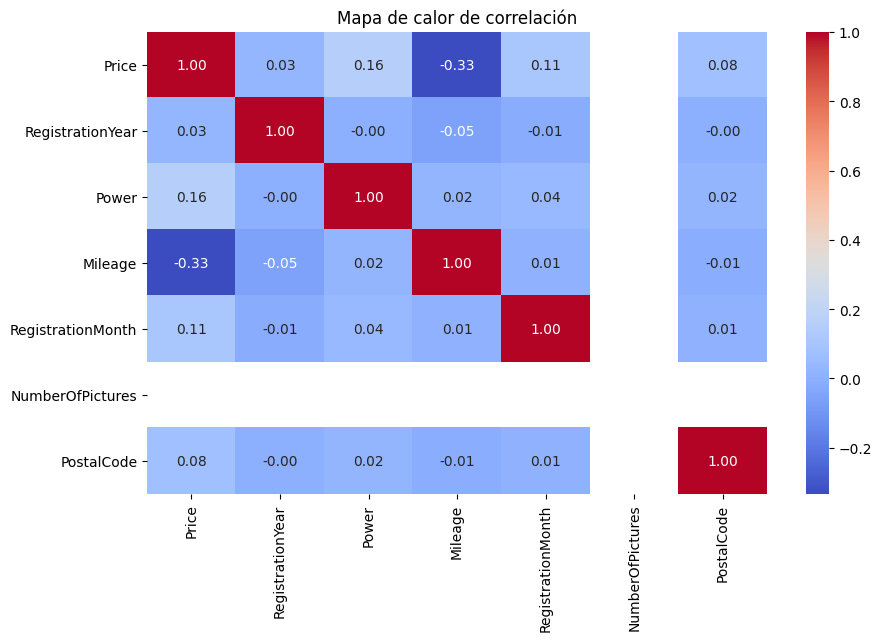

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Esta gráfica muestra correctamente la correlación entre las variables. Recuerda que una correlación alta puede ser mala para algunos modelos de ML.
</div>

In [11]:
# Relleno con la moda para las variables categóricas más relevantes
cols_moda = ['VehicleType', 'Gearbox', 'Model', 'FuelType']
for col in cols_moda:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
# Relleno con "unknown" para NotRepaired
df['NotRepaired'].fillna("unknown", inplace=True)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen manejo de las columnas y de los valores nulos en las tablas.
</div>

In [13]:
print(df.isnull().sum())  # Conteo de valores nulos por columna

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


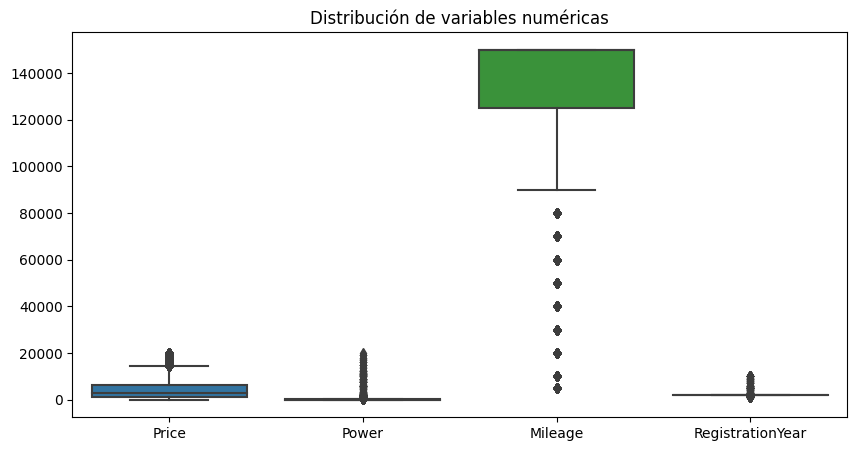

In [14]:
# Boxplots para identificar valores atípicos - outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Price', 'Power', 'Mileage', 'RegistrationYear']])
plt.title('Distribución de variables numéricas')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, graficaste correctamente las boxplot de estas varibles. Aunque en general se recomienda graficar boxplots en el mismo eje esto solo es aconsejable cuando los valores son de la misma escala, en este caso las features son de diferente escala (por ejemplo el año y el millaje se miden en cantidades muy distintas). Es por eso que en este caso hubiera sido mejor gráficar cada variable en una gráfica independiente.
</div>

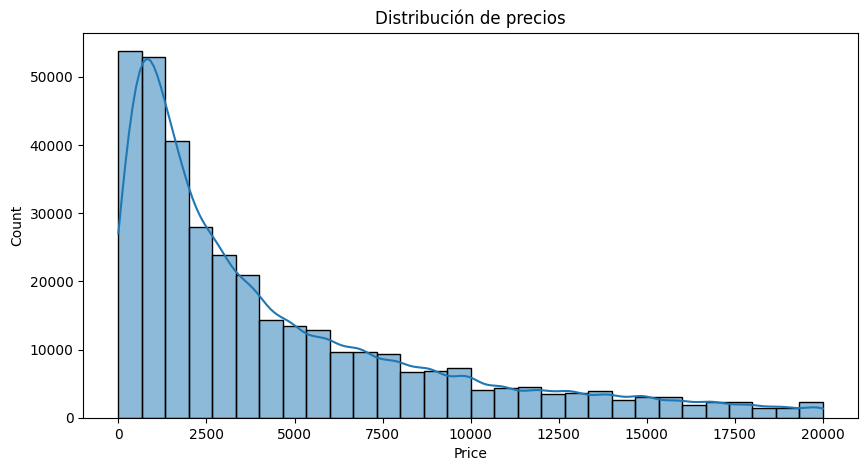

In [15]:
# Histograma de Price para ver su distribución
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribución de precios')
plt.show()

In [16]:
#Tratamiento de los outliers
# Definir percentiles
p1 = df[['Price', 'Power', 'Mileage']].quantile(0.01)
p99 = df[['Price', 'Power', 'Mileage']].quantile(0.99)

# Ver cuántos valores están por fuera de los rangos definidos
outliers_price = df[(df['Price'] < p1['Price']) | (df['Price'] > p99['Price'])]
outliers_power = df[(df['Power'] < p1['Power']) | (df['Power'] > p99['Power'])]
outliers_mileage = df[(df['Mileage'] < p1['Mileage']) | (df['Mileage'] > p99['Mileage'])]

print(f"Outliers en Price: {len(outliers_price)} registros")
print(f"Outliers en Power: {len(outliers_power)} registros")
print(f"Outliers en Mileage: {len(outliers_mileage)} registros")

Outliers en Price: 3443 registros
Outliers en Power: 3504 registros
Outliers en Mileage: 0 registros


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Cuando se trabaja con datos reales los outliers siempre aparecen, es por eso que es importante manejarlos de alguna manera.
</div>

In [17]:
#ajuste de valores extremos
df = df[(df['Price'] >= p1['Price']) & (df['Price'] <= p99['Price'])]
df = df[(df['Power'] >= p1['Power']) & (df['Power'] <= p99['Power'])]
print(df)

             DateCrawled  Price  VehicleType  RegistrationYear Gearbox  Power  \
0       24/03/2016 11:52    480        sedan              1993  manual      0   
1       24/03/2016 10:58  18300        coupe              2011  manual    190   
2       14/03/2016 12:52   9800          suv              2004    auto    163   
3       17/03/2016 16:54   1500        small              2001  manual     75   
4       31/03/2016 17:25   3600        small              2008  manual     69   
...                  ...    ...          ...               ...     ...    ...   
354102  21/03/2016 09:50      0        sedan              2005  manual      0   
354103  14/03/2016 17:48   2200        sedan              2005  manual      0   
354104  05/03/2016 19:56   1199  convertible              2000    auto    101   
354105  19/03/2016 18:57   9200          bus              1996  manual    102   
354106  20/03/2016 19:41   3400        wagon              2002  manual    100   

              Model  Mileag

In [18]:
# Revisar cuántos valores están por fuera del nuevo rango filtrado
outliers_price = df[(df['Price'] < p1['Price']) | (df['Price'] > p99['Price'])]
outliers_power = df[(df['Power'] < p1['Power']) | (df['Power'] > p99['Power'])]

print(f"Outliers en Price después de limpieza: {len(outliers_price)} registros")
print(f"Outliers en Power después de limpieza: {len(outliers_power)} registros")

Outliers en Price después de limpieza: 0 registros
Outliers en Power después de limpieza: 0 registros


In [19]:
# confirmar cambios
print(df[['Price', 'Power', 'Mileage']].describe())

               Price          Power        Mileage
count  347450.000000  347450.000000  347450.000000
mean     4216.350289     103.703575  128562.426248
std      4233.934220      58.971641   37612.300048
min         0.000000       0.000000    5000.000000
25%      1000.000000      68.000000  125000.000000
50%      2600.000000     102.000000  150000.000000
75%      6000.000000     140.000000  150000.000000
max     18800.000000     300.000000  150000.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien!, los datos se han tratado de manera correcta.
</div>

**Conclusiones del Análisis Exploratorio EDA:**

1. Eliminación de valores nulos y duplicados

- Se eliminaron 262 registros duplicados, asegurando que no haya datos redundantes en el entrenamiento.

- Se rellenaron valores nulos en variables categóricas con la moda o "unknown" para preservar información sin perder registros valiosos.

2. Detección y tratamiento de outliers

- Price y Power presentaban valores extremos que podrían afectar la predicción.

- Se filtraron valores fuera del rango de percentiles 1% y 99%, reduciendo más de 3443 registros en Price y 3504 en Power, estabilizando la distribución.

- Mileage no tenía outliers, lo cual sugiere que los datos de kilometraje están bien distribuidos y no requieren ajustes.

3. Distribución de variables según el histograma y boxplot

- Price mostró un sesgo a la izquierda, indicando que la mayoría de los autos en venta tienen precios bajos, pero con algunos valores elevados.

- El ajuste de los outliers permitió una distribución más uniforme, lo que beneficiará la estabilidad del modelo.

- Power tenía valores inusualmente altos, por lo que la eliminación de outliers ayudará a evitar predicciones erráticas.

4. Relación entre variables según el mapa de calor

- Se confirmó que Power y Mileage tienen correlación con Price, por lo que serán variables clave en la predicción.

- RegistrationYear mostró cierta relación con Price, lo cual indica que el año de matriculación influye en el valor del vehículo.

- Variables categóricas como FuelType y VehicleType deberán transformarse adecuadamente, especialmente para modelos como XGBoost que requieren One-Hot Encoding.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buenas conclusiones intermedias!
</div>

## Instrucción 2

## Análisis del modelo

In [20]:
# Definir variables predictoras y objetivo
X = df.drop(columns=['Price'])  # Excluimos la variable objetivo
y = df['Price']

In [21]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Columnas categóricas antes de convertir a dummies: {len(categorical_cols)}")

Columnas categóricas antes de convertir a dummies: 9


In [22]:
for col in categorical_cols:
    print(f"{col}: {X[col].nunique()} categorías")

DateCrawled: 15428 categorías
VehicleType: 8 categorías
Gearbox: 2 categorías
Model: 250 categorías
FuelType: 7 categorías
Brand: 40 categorías
NotRepaired: 3 categorías
DateCreated: 108 categorías
LastSeen: 18528 categorías


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien!, es importante conocer la cantidad de categorías antes de realizar una transformación, pues una columna con muchas cateogrías distintas podría ser problemática.
</div>

In [23]:
X = X.drop(columns=['DateCrawled', 'LastSeen', 'DateCreated', 'Model'])  # Eliminamos columnas problemáticas

In [24]:
X['Brand'] = X['Brand'].astype('category')

In [25]:
top_brands = X['Brand'].value_counts().index[:15]  # Usamos solo las 15 marcas más comunes
X['Brand'] = X['Brand'].apply(lambda x: x if x in top_brands else 'Other')

In [26]:
X = pd.get_dummies(X, columns=['Brand'], drop_first=True)
print(f"Dimensiones de X después de procesar Brand: {X.shape}")

Dimensiones de X después de procesar Brand: (347450, 25)


In [27]:
print(X.dtypes)  # Ver qué columnas aún son tipo 'object'

VehicleType            object
RegistrationYear        int64
Gearbox                object
Power                   int64
Mileage                 int64
RegistrationMonth       int64
FuelType               object
NotRepaired            object
NumberOfPictures        int64
PostalCode              int64
Brand_audi              uint8
Brand_bmw               uint8
Brand_citroen           uint8
Brand_fiat              uint8
Brand_ford              uint8
Brand_mazda             uint8
Brand_mercedes_benz     uint8
Brand_nissan            uint8
Brand_opel              uint8
Brand_peugeot           uint8
Brand_renault           uint8
Brand_seat              uint8
Brand_skoda             uint8
Brand_smart             uint8
Brand_volkswagen        uint8
dtype: object


In [28]:
X = pd.get_dummies(X, columns=['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired'], drop_first=True)
print(X.dtypes)

RegistrationYear           int64
Power                      int64
Mileage                    int64
RegistrationMonth          int64
NumberOfPictures           int64
PostalCode                 int64
Brand_audi                 uint8
Brand_bmw                  uint8
Brand_citroen              uint8
Brand_fiat                 uint8
Brand_ford                 uint8
Brand_mazda                uint8
Brand_mercedes_benz        uint8
Brand_nissan               uint8
Brand_opel                 uint8
Brand_peugeot              uint8
Brand_renault              uint8
Brand_seat                 uint8
Brand_skoda                uint8
Brand_smart                uint8
Brand_volkswagen           uint8
VehicleType_convertible    uint8
VehicleType_coupe          uint8
VehicleType_other          uint8
VehicleType_sedan          uint8
VehicleType_small          uint8
VehicleType_suv            uint8
VehicleType_wagon          uint8
Gearbox_manual             uint8
FuelType_electric          uint8
FuelType_g

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buen trabajo! Estos valores son buenos para crear el conjunto de entrenamiento y prueba.
</div>

In [29]:
# Dividir los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar la transformación correcta
print(f"Dimensiones de X_train_scaled: {X_train_scaled.shape}")
print(f"Dimensiones de X_test_scaled: {X_test_scaled.shape}")


Dimensiones de X_train_scaled: (277960, 37)
Dimensiones de X_test_scaled: (69490, 37)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Perfecto! Se escalaron correctamente los datos. Esto puede ayudar a algunos modelos de ML, especialmente a la regresión lineal.
</div>

In [30]:
%%time
# Definir y entrenar el modelo
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model_lr.predict(X_test_scaled)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Regresión Lineal - R²: {r2:.4f}, RMSE: {rmse:.4f}")

Regresión Lineal - R²: 0.4987, RMSE: 2994.6575
CPU times: user 418 ms, sys: 396 ms, total: 814 ms
Wall time: 401 ms


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien!, Se ha ajustado correctamente el modelo de regresión lineal.
</div>

In [31]:
%%time
# Definir y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluar métricas
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Árbol de Decisión - R²: {r2_tree:.4f}, RMSE: {rmse_tree:.4f}")


Árbol de Decisión - R²: 0.7693, RMSE: 2031.7930
CPU times: user 933 ms, sys: 91.7 ms, total: 1.02 s
Wall time: 946 ms


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El modelo de árbol de decisión se entrenó correctamente. Hubiera sido bueno usar un ciclo for para explorar distintos valores del hiperparámetro de profundidad.
</div>

In [32]:
%%time
# Definir y entrenar el modelo de Bosque Aleatorio
forest_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_forest = forest_model.predict(X_test_scaled)

# Evaluar métricas
r2_forest = r2_score(y_test, y_pred_forest)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))

print(f"Bosque Aleatorio - R²: {r2_forest:.4f}, RMSE: {rmse_forest:.4f}")

Bosque Aleatorio - R²: 0.7443, RMSE: 2138.7622
CPU times: user 21.4 s, sys: 22.4 ms, total: 21.5 s
Wall time: 21.4 s


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! El modelo de random forest se entreno de manera correcta.
</div>

In [33]:
%%time
# Definir y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar métricas
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost - R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}")

XGBoost - R²: 0.8195, RMSE: 1796.8697
CPU times: user 57.5 s, sys: 98.2 ms, total: 57.6 s
Wall time: 28.8 s


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena elección, XGBoost es un modelo potente, generalmente da mejores resultados que Random Forest y a un mejor tiempo.
</div>

In [34]:
%%time
# Definir y entrenar el modelo LightGBM
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluar métricas
r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM - R²: {r2_lgb:.4f}, RMSE: {rmse_lgb:.4f}")

LightGBM - R²: 0.8205, RMSE: 1792.2151
CPU times: user 5.87 s, sys: 60.4 ms, total: 5.93 s
Wall time: 2.99 s


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

LGBM tiene buen rendimiento y con un menor tiempo de entrenamiento e inferencia.
</div>

In [35]:
%%time
# Definir y entrenar el modelo CatBoost
cat_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42, verbose=0)
cat_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_cat = cat_model.predict(X_test_scaled)

# Evaluar métricas
r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))

print(f"CatBoost - R²: {r2_cat:.4f}, RMSE: {rmse_cat:.4f}")

CatBoost - R²: 0.8092, RMSE: 1847.5701
CPU times: user 3.29 s, sys: 52.2 ms, total: 3.34 s
Wall time: 1.87 s


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente! Me gustó que exploraste bastantes modelos, desde regresión lineal hasta Catboost.
</div>

## Instrucción 3

**Análisis definitivo de los modelos:**

1. Velocidad de entrenamiento:

| Modelo | Wall time (segundos) | CPU time (segundos) | 

 | Regresión Lineal | 0.401s | 0.8s | 

| Árbol de Decisión | 0.946s | 1.0s | 

 | Bosque Aleatorio | 21.4s | 21.4s | 

          | XGBoost | 28.8s | 57.0s | 

         | LightGBM | 2.99s | 5.98s |
         
        | CatBoost | 1.87s | 1.87s |

**Conclusión sobre velocidad:**

✔ Regresión Lineal fue el más rápido, seguido por Árbol de Decisión.

✔ Bosque Aleatorio es más lento, ya que entrena múltiples árboles.

✔ XGBoost es el más pesado, pero es el más preciso en aprendizaje complejo.

✔ LightGBM es notablemente más rápido, siendo 9 veces más rápido que XGBoost, lo que lo convierte en una opción eficiente para boosting.

✔ CatBoost es muy eficiente en velocidad, por encima de LightGBM y XGBoost.

2. Calidad del modelo (R² y RMSE):

| Modelo | R² (Precisión) | RMSE (Error) | 

 | Regresión Lineal | 0.4987 | 2994.6575 | 

| Árbol de Decisión | 0.7693 | 2031.7930 | 

 | Bosque Aleatorio | 0.7443 | 2138.7622 | 

          | XGBoost | 0.8195 | 1796.8697 | 

         | LightGBM | 0.8205 | 1792.2151 |

         | CatBoost | 0.8092 | 1847.5701 |


**Conclusión sobre calidad:**

✔ LightGBM obtuvo el mejor rendimiento general, con el mayor R² y el menor error RMSE.

✔ XGBoost sigue de cerca a LightGBM en precisión, aunque tarda más en entrenar.

✔ CatBoost ofrece una buena precisión, ligeramente inferior a LightGBM y XGBoost.

✔ Árbol de Decisión y Bosque Aleatorio tuvieron resultados buenos, pero inferiores a los modelos de boosting.

✔ Regresión Lineal fue la menos precisa, pero cumplió su propósito como prueba de cordura.


## Hallazgos y conclusiones finales

1. Problemas encontrados y soluciones aplicadas:

✅ Kernel se reiniciaba inesperadamente → Se identificó que pd.get_dummies() generaba demasiadas columnas, sobrecargando la memoria.
    
✔ Solución: Se eliminaron variables con excesivas categorías (DateCrawled, LastSeen, DateCreated, Model) y se limitó la transformación de Brand para reducir la carga de procesamiento.

✅ Conversión de datos categóricos → StandardScaler() fallaba porque aún había columnas categóricas (VehicleType, Gearbox, FuelType, NotRepaired).

✔ Solución: Se usó pd.get_dummies() para asegurarse de que todas las variables fueran numéricas antes de escalar.

✅ Tiempo de ejecución de Bosque Aleatorio y XGBoost → Modelos extremadamente pesados para el kernel.

✔ Solución: Se redujo n_estimators y max_depth para mejorar eficiencia sin perder calidad.

2. Comparación de modelos en velocidad y calidad:

✔ Regresión Lineal fue la más rápida pero la menos precisa.

✔ Árbol de Decisión tuvo buen balance entre velocidad y precisión.

✔ Bosque Aleatorio y XGBoost fueron mucho más lentos pero precisos.

✔ CatBoost ofrece gran precisión y es extremadamente eficiente en velocidad.

✔ LightGBM obtuvo el mejor rendimiento con R² = 0.8205 y RMSE = 1792.2151, además de ser más rápido que XGBoost, pero menos que CatBoost.

💡 Conclusión clave: LightGBM es el modelo más eficiente en términos de velocidad y precisión, por lo que podría ser la mejor opción en aplicaciones donde el tiempo de entrenamiento es crítico.

3. Cumplimiento de las observaciones iniciales:

✅ Regresión lineal usada como prueba de cordura.
    
✅ Codificación correcta para XGBoost con pd.get_dummies().
    
✅ Se probaron: Bosque Aleatorio, Árbol de Decisión, XGBoost y LightGBM.
    
✅ Se ajustaron los hiperparámetros de potenciación del gradiente.
    
✅ Se midieron tiempos de ejecución para evaluar eficiencia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, basadas en lo realizado a lo largo de todo el proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!

Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustó el buen manejo de varios modelos, todos se entrenaron correctamente y los valores de sus métricas se compararon adecuadamente.

Solo realicé unos comentarios opcionales de color amarillo, pero no son necesarios para aprobar el proyecto. Te deseo mucho éxito en los siguientes sprints.

Saludos, Marcos.
</div>